In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from articulate_anything.agent.actor.mesh_retrieval.partnet_mesh_annotator import *
from dotenv import load_dotenv
from omegaconf import OmegaConf, DictConfig
from articulate_anything.utils.mesh_utils import load_obj, visualize_mesh
from articulate_anything.physics.sapien_simulate import simulate_sapien
from articulate_anything.utils.utils import load_config

/home/vlongle/miniconda3/envs/articulate-anything-clean/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pybullet build time: Nov 28 2023 23:52:03


In [3]:
import os
os.chdir('..')

This notebook goes over some preprocessing steps to prepare the data for mesh retrieval from a visual prompt (i.e., image or video)

`Articulate-Anything` template matches the image of the groundtruth against each object in the PartNet-Mobility. The preprocessing here is simple: generate a photo rendering of each object in the PartNet-Mobility dataset.

In [4]:
partnet_dir = "datasets/partnet-mobility-v0/dataset/100248"

In [5]:
API_KEY = "YOUR-ACTUAL-API-GEMINI-KEY"
## we have our API key stored in a .env file
load_dotenv()
API_KEY = os.environ.get('API_KEY')

In [6]:
cfg = load_config()
## render a static image instead of video
cfg.simulator.simulation_params.stationary_or_move = "stationary" ## "move"
## for video and "stationary" for static image
cfg.simulator.urdf.file = f"{partnet_dir}/mobility.urdf"

## for higher quality image (but slower)
cfg.simulator.ray_tracing = True ## options: True, False
## for different floor texture
cfg.simulator.floor_texture = "checkerboard" ## options: plain, checkerboard

/home/vlongle/miniconda3/envs/articulate-anything-clean/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [7]:
simulate_sapien(cfg.simulator)

[2024-08-16 12:28:51.078] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-08-16 12:28:51.078] [svulkan2] [warning] Continue without GLFW.


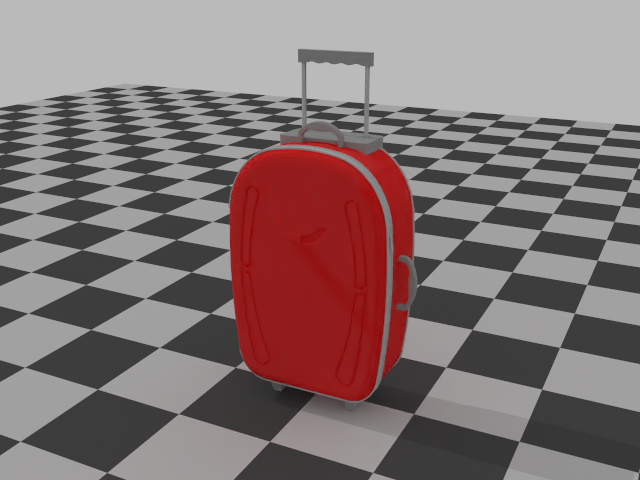

In [8]:
Image.open(f"{partnet_dir}/robot_frontview.png")